# In This Code I Will Be Making A Mumbai Exploratory Data Analysis (EDA)

Note: I'm a Beginner for any queries please comment as it may help me become a better data scientist and ML engineer. Feel free to comment the best machine learning model code which can be used as i have failed to create one.

### Things I Will Cover in This Project

- Data Exploration
- Feature Engineering
- Data Cleaning
- Exploratory Data Analysis(EDA)


#### Import Modules

In [57]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

#### Import File

In [58]:
df = pd.read_csv('/kaggle/input/housing-prices-in-mumbai/Mumbai1.csv')

**Function for Creating a Scrollable Output Cell**

In [59]:
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html



**Data Exploration**

In [60]:
numerical_features = df.select_dtypes(include = [np.number])
numerical_features.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features','Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6347.0,3.173000e+03,1.832365e+03,0.0,1586.5,3173.0,4759.5,6346.0
Price,6347.0,1.515401e+07,2.015943e+07,2000000.0,5300000.0,9500000.0,17500000.0,420000000.0
Area,6347.0,1.004327e+03,5.563757e+02,200.0,650.0,905.0,1182.0,8511.0
No. of Bedrooms,6347.0,1.910036e+00,8.633037e-01,1.0,1.0,2.0,2.0,7.0
New/Resale,6347.0,3.417363e-01,4.743290e-01,0.0,0.0,0.0,1.0,1.0
Gymnasium,6347.0,5.813770e-01,4.933722e-01,0.0,0.0,1.0,1.0,1.0
Lift Available,6347.0,8.014810e-01,3.989164e-01,0.0,1.0,1.0,1.0,1.0
Car Parking,6347.0,5.629431e-01,4.960614e-01,0.0,0.0,1.0,1.0,1.0
Maintenance Staff,6347.0,2.813928e-01,4.497141e-01,0.0,0.0,0.0,1.0,1.0
24x7 Security,6347.0,5.629431e-01,4.960614e-01,0.0,0.0,1.0,1.0,1.0


In [62]:
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary Statistics For Categorical Features')

display (HTML(html_categorical))

,count,unique,top,freq
Location,6347,413,Kharghar,533


In [63]:
# Null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
Unnamed: 0,0
Price,0
Area,0
Location,0
No. of Bedrooms,0
New/Resale,0
Gymnasium,0
Lift Available,0
Car Parking,0
Maintenance Staff,0


In [64]:
df.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children's Play Area',
       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
       'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

### Exploratory Data Analysis (EDA)

**Histogram of Price Distribution:**

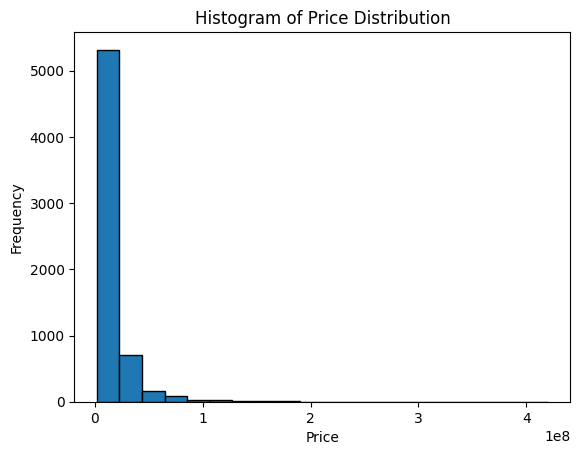

In [65]:
plt.hist(df['Price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price Distribution')
plt.show()

**Scatter Plot of Price vs. Area:**

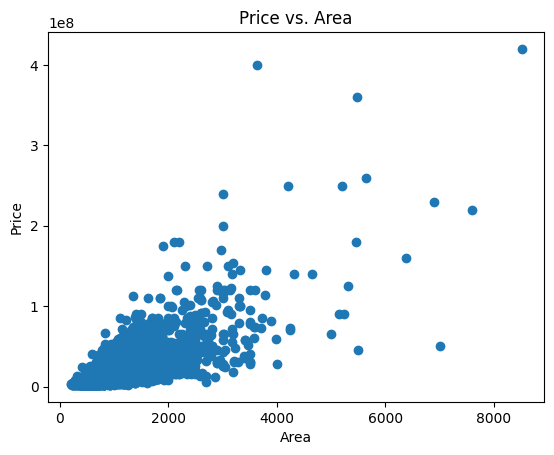

In [66]:
plt.scatter(df['Area'], df['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs. Area')
plt.show()

**Box Plot of Price by Number of Bedrooms:**

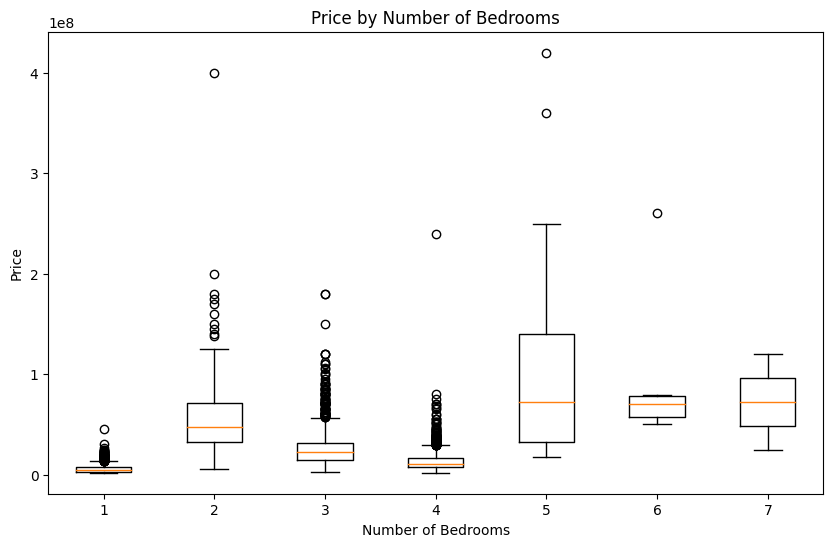

In [67]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['No. of Bedrooms'] == bedrooms]['Price'] for bedrooms in df['No. of Bedrooms'].unique()])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price by Number of Bedrooms')
plt.xticks(range(1, len(df['No. of Bedrooms'].unique()) + 1), sorted(df['No. of Bedrooms'].unique()))
plt.show()

**Correlation Heatmap:**

/tmp/ipykernel_34/3640610541.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


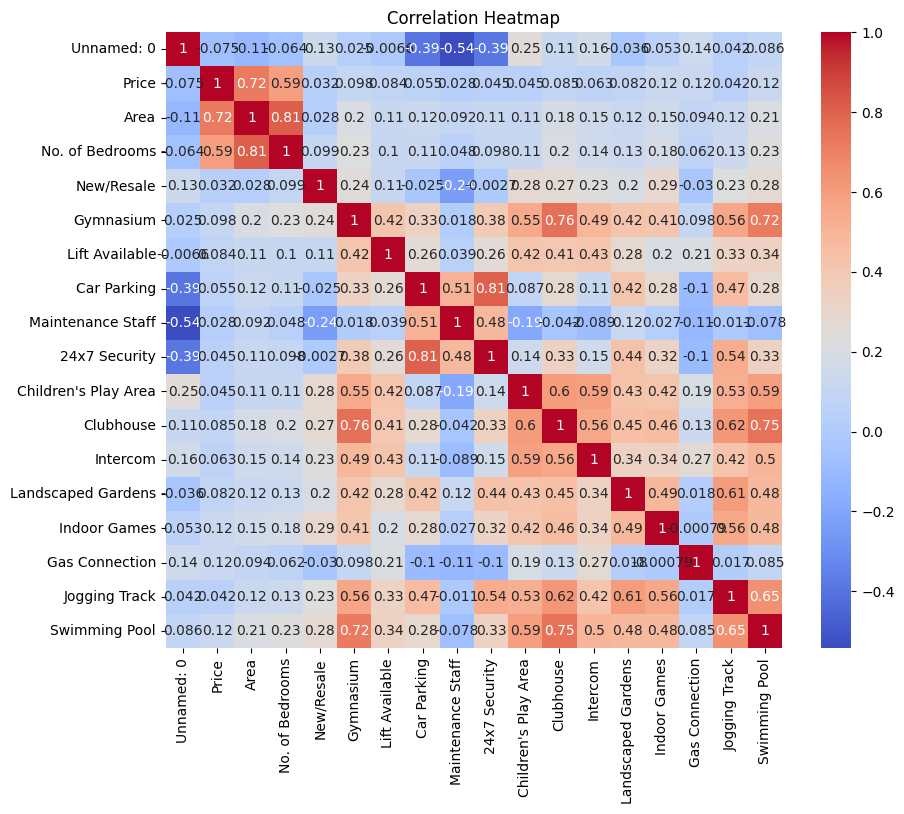

In [68]:
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()